# Convolutional Neural Network

## Import Dependencies

In [1]:
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import utils; reload(utils)

from utils import *
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from IPython.display import Image

## Configure Parameters

In [3]:
# Embedding
embedding_size = 50
max_features = 5000
maxlen = 400

# Convolution
kernel_size = 3
pool_size = 4
filters = 250

# Dense
hidden_dims = 250

# Training
batch_size = 64
epochs = 4

## Data Preparation

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

Train data size: (25000, 400)
Test data size: (25000, 400)


## Modelling

In [6]:
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features, 
                    embedding_size, 
                    input_length=maxlen))
model.add(Dropout(0.2))


model.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# plot_model(model, to_file='model.png', show_shapes=True)
# Image(filename = 'model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

## Evaluation

In [7]:
# Train the model
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test, y_test),
         verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 11s - loss: 0.4435 - acc: 0.7710 - val_loss: 0.2819 - val_acc: 0.8826
Epoch 2/4
25000/25000 [==============================] - 7s - loss: 0.2404 - acc: 0.9023 - val_loss: 0.2747 - val_acc: 0.8854
Epoch 3/4
25000/25000 [==============================] - 7s - loss: 0.1677 - acc: 0.9372 - val_loss: 0.2660 - val_acc: 0.8922
Epoch 4/4
25000/25000 [==============================] - 7s - loss: 0.1167 - acc: 0.9578 - val_loss: 0.2960 - val_acc: 0.8903


In [8]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
preds = model.predict_classes(x_test, batch_size=batch_size)

24960/25000 [============================>.] - ETA: 0s

In [13]:
# Save the model weights
model_path = 'data/imdb/models/'
model.save(model_path + 'cnn_model.h5')
model.save_weights(model_path + 'cnn_weights.h5')

[[11059  1441]
 [ 1302 11198]]


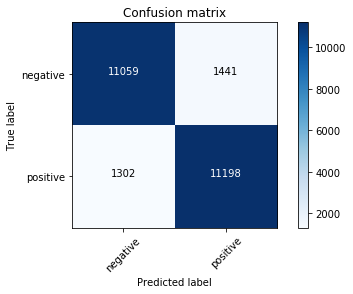

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [15]:
# F1 score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

Test accuracy: 0.890280000095
Test score (loss): 0.295986293402

F1 Score (Macro): 0.890276608055
F1 Score (Micro): 0.89028
